In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Define source
credit_risk_path = "Resources/lending_data.csv"
# Import the data
credit_risk_data = pd.read_csv(credit_risk_path)
# Display preview
credit_risk_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
# Determine whether data is balanced/need for scaling
credit_risk_data.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [4]:
credit_risk_data['loan_status'].value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

In [5]:
75036/77536

0.9677569129178704

It appears that the data is not balanced. Nearly 97% of the data in the target column has status '0', so we will scale the data before fitting the models.

In [6]:
# Assign the data to X and y
X = credit_risk_data[['loan_size','interest_rate','borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks','total_debt']]
y = credit_risk_data['loan_status'].values
print("Shape: ", X.shape, y.shape)

Shape:  (77536, 7) (77536,)


In [7]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Prediction: I predict that the Logistic regression model will perform better. Based on the material presented, it is ideal to try logistic regression first to see how the model does, and often a simpler model is "good enough" and should be used when applicable and minimal data preprocessing is needed. 

## Logistic Regression

In [9]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier

LogisticRegression()

In [10]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [11]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [12]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9942908240473243
Testing Data Score: 0.9936545604622369


In [13]:
# Create confusion matrix for additional confirmation on performance of model
y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[18652,   113],
       [   10,   609]])

In [14]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")

Accuracy: 0.9936545604622369


## Random Forest Classifier

In [15]:
# Train a Random Forest Classifier model and print the model score 
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9974893382858715
Testing Score: 0.9910751134956666


In [16]:
# Print classification report for additional confirmation on performance of model
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.88      0.86       619

    accuracy                           0.99     19384
   macro avg       0.92      0.94      0.93     19384
weighted avg       0.99      0.99      0.99     19384



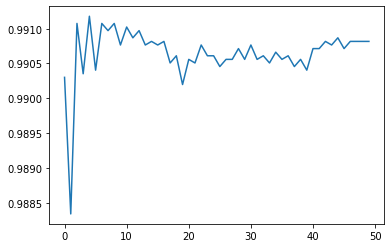

score: 0.9908171687990095


In [17]:
# Manual construction of random forest classifier for further exploration
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

Conclusion: Both models perform well on this data set, with scores over 0.99. Going back to my prediction, we could say that Logisitc Regression would be preferred here since the model performs well and is the more efficient/simple option.